# figure 1

Simulate neurons with random uniform connectivity matrix and compute eigenvalues, 10000 neurons (nn),
200 simulations with different random initial conditions, 60000 timepoints long.

Saves the results in `evals_sys_nonsym.npy` and `evals_bin_all.npy`.
 

In [1]:
import numpy as np 
import torch
from rastermap import Rastermap
from tqdm import trange 
import sys, os
sys.path.insert(0, "../")
from powerlaw import fit_powerlaw_exp, zscore_and_compute_evals
import simulations

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
print("simulating symmetric random connectivity dynamics")
simulations.set_seed(10, device)
Asym_ex, Xsym_ex, esym_ex = simulations.simulate_random(nn=10000, nonsym=0, nd=200)
Xt = Xsym_ex[:, :1000].cpu().numpy()
# compute eigenvalues of covariance
evals_sym, evecs = zscore_and_compute_evals(Xsym_ex)
alpha, yp = fit_powerlaw_exp(evals_sym, np.arange(10, 500))
print(fr"symmetric; alpha = {alpha:.3f}")

print("simulating nonsymmetric random connectivity dynamics")
simulations.set_seed(10, device)
Anonsym_ex, Xnonsym_ex, enonsym_ex = simulations.simulate_random(nn=10000, nonsym=1, nd=200)
# compute eigenvalues of covariance
evals_nonsym, evecs = zscore_and_compute_evals(Xnonsym_ex)
alpha, yp = fit_powerlaw_exp(evals_nonsym, np.arange(10, 500))
print(fr"nonsymmetric; alpha = {alpha:.3f}")

os.makedirs("../results", exist_ok=True)
np.save("../results/ex_fig1.npy", {"esym_ex": esym_ex.cpu().numpy(), "enonsym_ex": enonsym_ex.cpu().numpy(),
                                   "evals_sym": evals_sym, "evals_nonsym": evals_nonsym,
                                   "Asym_ex": Asym_ex.cpu().numpy(), "Xt": Xt,
                                   "Anonsym_ex": Anonsym_ex.cpu().numpy()})


simulating symmetric random connectivity dynamics


100%|██████████| 60000/60000 [03:26<00:00, 290.54it/s]


symmetric; alpha = 0.684
simulating nonsymmetric random connectivity dynamics


100%|██████████| 60000/60000 [03:26<00:00, 290.37it/s]


nonsymmetric; alpha = 1.308


### make figure

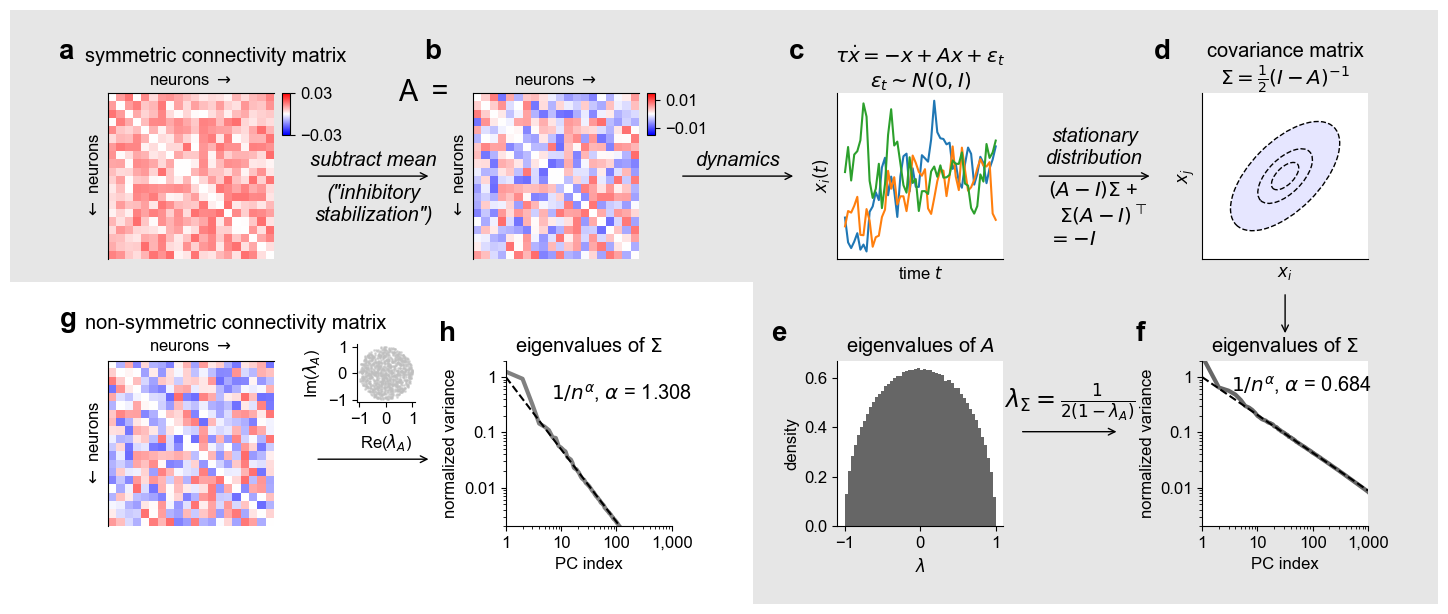

In [3]:
import fig1 

dat = np.load("../results/ex_fig1.npy", allow_pickle=True).item()
fig = fig1.fig1(dat)
os.makedirs("../figures", exist_ok=True)
fig.savefig("../figures/fig1.pdf")

# suppfigs

In [3]:
# simulate uniform random connectivity (Figures S2 and Figures S3) (~3.5-4 hours)
# 10 random matrices for each symmetry type (n_sim)
# 10000 neurons per simulation (nn)
out = simulations.random_uniform_sim(n_sim=10, nn=10000, device=device)
evals_all, nonsyms, Xsym_ex, Xnonsym_ex, evals_bin_all, tbins = out
  
np.save("../results/evals_sym_nonsym.npy", {"evals_all": evals_all, "nonsyms": nonsyms, 
                                    "Xsym_ex": Xsym_ex, "Xnonsym_ex": Xnonsym_ex})
np.save("../results/evals_bin_all.npy", {"evals_bin_all": evals_bin_all, 
                            "tbins": tbins})

# simulate different probability distributions for random connectivity (Figure S1) (~2 hours)
out = simulations.random_probs_sim(n_sim=10, nn=10000, device=device)
evals_all, Aexs, distributions = out
np.save("../results/evals_probs.npy", {"evals_all": evals_all, "Aexs": Aexs, 
                                "distributions": distributions})

100%|██████████| 60000/60000 [03:26<00:00, 290.72it/s]


0 0.00; alpha = 0.715


100%|██████████| 60000/60000 [03:26<00:00, 290.45it/s]


0 0.33; alpha = 0.791


100%|██████████| 60000/60000 [03:26<00:00, 290.31it/s]


0 0.67; alpha = 1.283


100%|██████████| 60000/60000 [03:26<00:00, 290.32it/s]


0 1.00; alpha = 1.166


100%|██████████| 60000/60000 [03:27<00:00, 289.01it/s]


1 0.00; alpha = 0.672


100%|██████████| 60000/60000 [03:26<00:00, 290.31it/s]


1 0.33; alpha = 0.826


100%|██████████| 60000/60000 [03:26<00:00, 290.18it/s]


1 0.67; alpha = 1.170


100%|██████████| 60000/60000 [03:26<00:00, 290.34it/s]


1 1.00; alpha = 1.201


100%|██████████| 60000/60000 [03:27<00:00, 289.24it/s]


2 0.00; alpha = 0.727


100%|██████████| 60000/60000 [03:26<00:00, 290.30it/s]


2 0.33; alpha = 0.837


100%|██████████| 60000/60000 [03:26<00:00, 290.19it/s]


2 0.67; alpha = 1.232


100%|██████████| 60000/60000 [03:26<00:00, 290.08it/s]


2 1.00; alpha = 1.389


100%|██████████| 60000/60000 [03:27<00:00, 289.15it/s]


3 0.00; alpha = 0.667


100%|██████████| 60000/60000 [03:26<00:00, 290.30it/s]


3 0.33; alpha = 0.832


100%|██████████| 60000/60000 [03:26<00:00, 290.02it/s]


3 0.67; alpha = 1.042


100%|██████████| 60000/60000 [03:26<00:00, 290.01it/s]


3 1.00; alpha = 1.175


100%|██████████| 60000/60000 [03:27<00:00, 288.92it/s]


4 0.00; alpha = 0.723


100%|██████████| 60000/60000 [03:26<00:00, 290.35it/s]


4 0.33; alpha = 0.763


100%|██████████| 60000/60000 [03:26<00:00, 290.29it/s]


4 0.67; alpha = 1.201


100%|██████████| 60000/60000 [03:26<00:00, 290.34it/s]


4 1.00; alpha = 1.361


100%|██████████| 60000/60000 [03:27<00:00, 289.08it/s]


5 0.00; alpha = 0.713


100%|██████████| 60000/60000 [03:26<00:00, 290.32it/s]


5 0.33; alpha = 0.848


100%|██████████| 60000/60000 [03:26<00:00, 290.23it/s]


5 0.67; alpha = 1.126


100%|██████████| 60000/60000 [03:26<00:00, 290.04it/s]


5 1.00; alpha = 1.166


100%|██████████| 60000/60000 [03:27<00:00, 288.95it/s]


6 0.00; alpha = 0.686


100%|██████████| 60000/60000 [03:26<00:00, 290.30it/s]


6 0.33; alpha = 0.821


100%|██████████| 60000/60000 [03:26<00:00, 290.32it/s]


6 0.67; alpha = 1.323


100%|██████████| 60000/60000 [03:26<00:00, 290.30it/s]


6 1.00; alpha = 1.020


100%|██████████| 60000/60000 [03:27<00:00, 289.01it/s]


7 0.00; alpha = 0.672


100%|██████████| 60000/60000 [03:26<00:00, 290.36it/s]


7 0.33; alpha = 0.810


100%|██████████| 60000/60000 [03:26<00:00, 290.30it/s]


7 0.67; alpha = 1.064


100%|██████████| 60000/60000 [03:26<00:00, 290.33it/s]


7 1.00; alpha = 1.243


100%|██████████| 60000/60000 [03:27<00:00, 289.10it/s]


8 0.00; alpha = 0.699


100%|██████████| 60000/60000 [03:26<00:00, 290.36it/s]


8 0.33; alpha = 0.845


100%|██████████| 60000/60000 [03:26<00:00, 290.30it/s]


8 0.67; alpha = 1.091


100%|██████████| 60000/60000 [03:26<00:00, 290.27it/s]


8 1.00; alpha = 1.292


100%|██████████| 60000/60000 [03:27<00:00, 289.08it/s]


9 0.00; alpha = 0.702


100%|██████████| 60000/60000 [03:26<00:00, 290.34it/s]


9 0.33; alpha = 0.844


100%|██████████| 60000/60000 [03:26<00:00, 290.27it/s]


9 0.67; alpha = 1.309


100%|██████████| 60000/60000 [03:26<00:00, 290.02it/s]


9 1.00; alpha = 1.525
2025-02-27 15:10:17,971 [INFO] normalizing data across axis=1
2025-02-27 15:10:20,349 [INFO] data normalized, 2.39sec
2025-02-27 15:10:20,351 [INFO] sorting activity: 10000 valid samples by 50000 timepoints
2025-02-27 15:10:26,053 [INFO] n_PCs = 200 computed, 8.09sec
2025-02-27 15:10:27,355 [INFO] 62 clusters computed, time 9.39sec
2025-02-27 15:10:29,565 [INFO] clusters sorted, time 11.60sec
2025-02-27 15:10:29,681 [INFO] clusters upsampled, time 11.72sec
2025-02-27 15:10:30,612 [INFO] rastermap complete, time 12.65sec
2025-02-27 15:10:30,721 [INFO] normalizing data across axis=1
2025-02-27 15:10:33,091 [INFO] data normalized, 2.38sec
2025-02-27 15:10:33,094 [INFO] sorting activity: 10000 valid samples by 50000 timepoints
2025-02-27 15:10:38,691 [INFO] n_PCs = 200 computed, 7.98sec


/home/carsen/miniforge3/envs/ci/lib/python3.10/site-packages/rastermap/cluster.py:138: UserWarning: found fewer than half the n_clusters that the user specified, rerunning with random initialization
  warnings.warn(


2025-02-27 15:10:40,400 [INFO] 100 clusters computed, time 9.69sec
2025-02-27 15:10:45,178 [INFO] clusters sorted, time 14.46sec
2025-02-27 15:10:45,316 [INFO] clusters upsampled, time 14.60sec
2025-02-27 15:10:46,282 [INFO] rastermap complete, time 15.57sec


100%|██████████| 60000/60000 [03:21<00:00, 297.70it/s]


binary, 0.688


100%|██████████| 60000/60000 [03:27<00:00, 288.85it/s]


gaussian, 0.697


100%|██████████| 60000/60000 [03:27<00:00, 289.13it/s]


trunc_gaussian, 0.662


100%|██████████| 60000/60000 [03:27<00:00, 289.10it/s]


exponential, 0.709


100%|██████████| 60000/60000 [03:21<00:00, 297.09it/s]


binary, 0.712


100%|██████████| 60000/60000 [03:28<00:00, 288.19it/s]


gaussian, 0.696


100%|██████████| 60000/60000 [03:28<00:00, 288.27it/s]


trunc_gaussian, 0.667


100%|██████████| 60000/60000 [03:28<00:00, 288.23it/s]


exponential, 0.666


100%|██████████| 60000/60000 [03:22<00:00, 296.56it/s]


binary, 0.692


100%|██████████| 60000/60000 [03:27<00:00, 288.81it/s]


gaussian, 0.697


100%|██████████| 60000/60000 [03:27<00:00, 288.92it/s]


trunc_gaussian, 0.717


100%|██████████| 60000/60000 [03:27<00:00, 288.97it/s]


exponential, 0.701


100%|██████████| 60000/60000 [03:21<00:00, 297.21it/s]


binary, 0.650


100%|██████████| 60000/60000 [03:27<00:00, 288.94it/s]


gaussian, 0.660


100%|██████████| 60000/60000 [03:27<00:00, 289.01it/s]


trunc_gaussian, 0.694


100%|██████████| 60000/60000 [03:27<00:00, 289.07it/s]


exponential, 0.687


100%|██████████| 60000/60000 [03:21<00:00, 297.50it/s]


binary, 0.697


100%|██████████| 60000/60000 [03:27<00:00, 288.95it/s]


gaussian, 0.654


100%|██████████| 60000/60000 [03:27<00:00, 289.05it/s]


trunc_gaussian, 0.700


100%|██████████| 60000/60000 [03:28<00:00, 288.32it/s]


exponential, 0.665


100%|██████████| 60000/60000 [03:22<00:00, 296.80it/s]


binary, 0.715


100%|██████████| 60000/60000 [03:28<00:00, 288.25it/s]


gaussian, 0.689


100%|██████████| 60000/60000 [03:28<00:00, 288.36it/s]


trunc_gaussian, 0.668


100%|██████████| 60000/60000 [03:28<00:00, 288.40it/s]


exponential, 0.707


100%|██████████| 60000/60000 [03:22<00:00, 296.85it/s]


binary, 0.674


100%|██████████| 60000/60000 [03:28<00:00, 288.31it/s]


gaussian, 0.693


100%|██████████| 60000/60000 [03:27<00:00, 289.10it/s]


trunc_gaussian, 0.708


100%|██████████| 60000/60000 [03:27<00:00, 289.08it/s]


exponential, 0.686


100%|██████████| 60000/60000 [03:21<00:00, 298.13it/s]


binary, 0.692


100%|██████████| 60000/60000 [03:27<00:00, 289.03it/s]


gaussian, 0.693


100%|██████████| 60000/60000 [03:27<00:00, 289.07it/s]


trunc_gaussian, 0.688


100%|██████████| 60000/60000 [03:27<00:00, 289.09it/s]


exponential, 0.697


100%|██████████| 60000/60000 [03:21<00:00, 297.60it/s]


binary, 0.657


100%|██████████| 60000/60000 [03:27<00:00, 288.99it/s]


gaussian, 0.681


100%|██████████| 60000/60000 [03:27<00:00, 289.09it/s]


trunc_gaussian, 0.679


100%|██████████| 60000/60000 [03:27<00:00, 289.12it/s]


exponential, 0.700


100%|██████████| 60000/60000 [03:22<00:00, 296.76it/s]


binary, 0.707


100%|██████████| 60000/60000 [03:28<00:00, 288.28it/s]


gaussian, 0.711


100%|██████████| 60000/60000 [03:28<00:00, 288.38it/s]


trunc_gaussian, 0.678


100%|██████████| 60000/60000 [03:28<00:00, 288.39it/s]


exponential, 0.693


(10, 4, 10000)
[0.69759129 0.82169442 1.18398461 1.25373235]
[0.69759129 0.70976067 0.72162814 0.73319979 0.75545113 0.78665525
 0.82451713 0.86638623 0.92285661 0.98885574 1.05572547 1.11570127
 1.17023277 1.21071212 1.23647464 1.24945942 1.25139337 1.24915021
 1.24626276]
[1.25373236 1.26610474 1.28226511 1.30120255 1.34408316 1.41211292
 1.4944937  1.56931187 1.6244946  1.63034827 1.60138258 1.59489687
 1.57225419 1.56391651 1.54322969 1.52070157 1.50541816 1.48979893
 1.48594994]


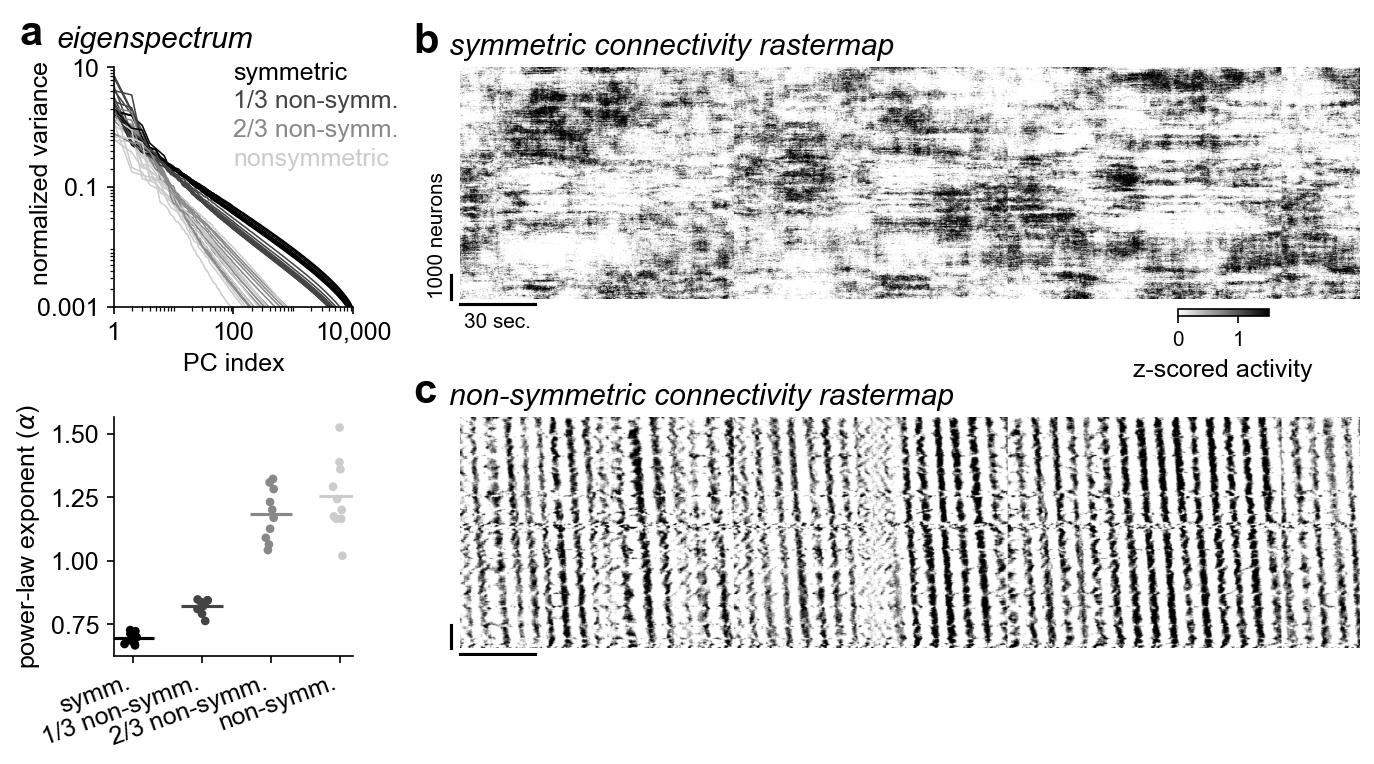

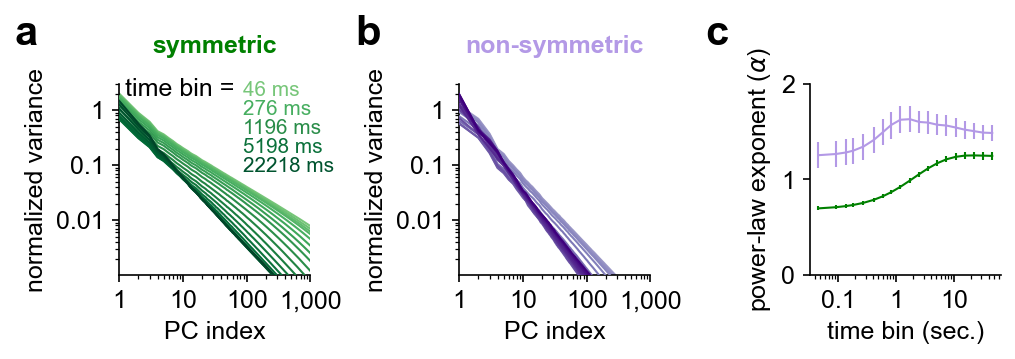

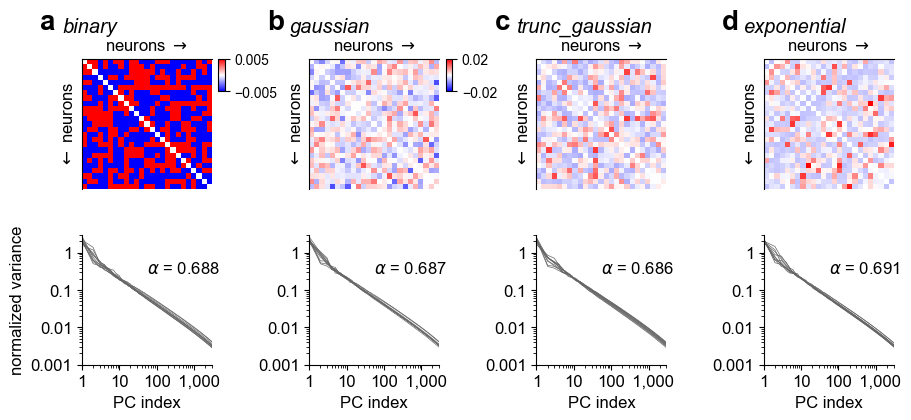

In [5]:
dat = np.load("../results/evals_sym_nonsym.npy", allow_pickle=True).item()
fig = fig1.suppfig_sim(dat)
fig.savefig("../figures/suppfig_sim.pdf")

dat = np.load("../results/evals_bin_all.npy", allow_pickle=True).item()
fig = fig1.suppfig_tbin(dat)
fig.savefig("../figures/suppfig_tbin.pdf")

dat = np.load("../results/evals_probs.npy", allow_pickle=True).item()
fig = fig1.suppfig_probs(dat)
fig.savefig("../figures/suppfig_probs.pdf")
